# 1. Import necessary libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn import metrics
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

# 2. Load Dataset

In [2]:
crime_data = pd.read_csv('crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# 3. Data Understanding

In [3]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# 4. Data Preprocessing

In [5]:
crime_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
crime_data.shape

(50, 4)

In [11]:
std = StandardScaler()
X = std.fit_transform(crime_data)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [13]:
inp = pd.DataFrame(X, columns=crime_data.columns)
inp

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


# 5. Clusterng

## A. Hierarchical Clustering

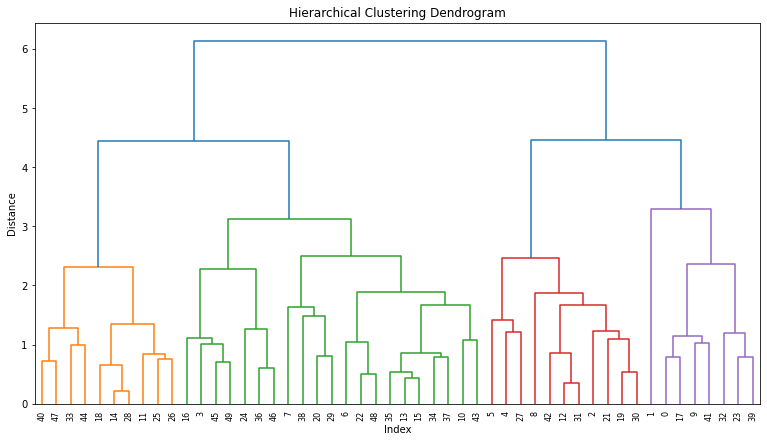

In [24]:
plt.figure(figsize=(13,7))
dendogram = sch.dendrogram(sch.linkage(inp, method='complete', metric='euclidean', optimal_ordering=False))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

### From the dendogram, no. of clusters = 4

In [25]:
hc = AgglomerativeClustering(n_clusters=4, linkage = 'complete')
hc_pred = hc.fit_predict(X)

In [26]:
crime_data['HC']=hc_pred

In [27]:
crime_data['HC'].value_counts()

1    21
2    11
3    10
0     8
Name: HC, dtype: int64

## B. Kmeans Clustering

### Optimal number of clusters can be founf out using Elbow Curve

In [28]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[199.99999999999997,
 104.96163315756871,
 80.08569526137276,
 57.55425863091105,
 50.07455380829824,
 44.84436543309824,
 41.19749970742401,
 35.51264557948977,
 31.309501189137013,
 26.7976610271052]

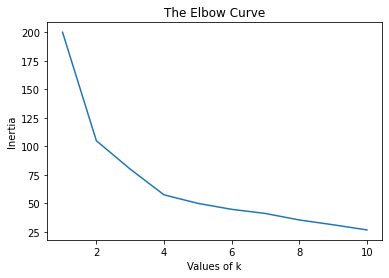

In [29]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Curve')
plt.ylabel('Inertia')
plt.xlabel('Values of k')
plt.show()

### For the given data, we can conclude that the optimal number of clusters for the data is 4

In [30]:
kmc = KMeans(n_clusters=4, random_state=12)
kmc.fit(X)

KMeans(n_clusters=4, random_state=12)

In [32]:
kmc.labels_

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 2, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3])

In [34]:
crime_data['Kmeans']=kmc.labels_
crime_data['Kmeans'].value_counts()

3    16
2    13
0    13
1     8
Name: Kmeans, dtype: int64

Text(0.5, 1.0, 'Clusters using KMeans')

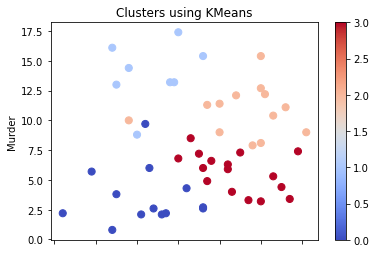

In [39]:
crime_data.plot(x="UrbanPop",y ="Murder",c=kmc.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

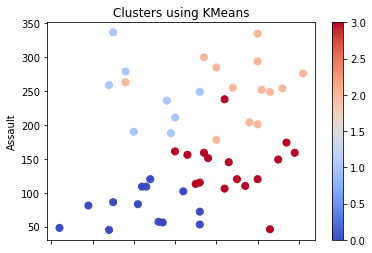

In [38]:
crime_data.plot(x="UrbanPop",y ="Assault",c=kmc.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

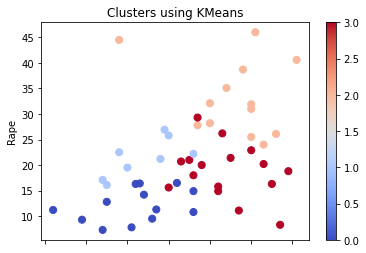

In [40]:
crime_data.plot(x="UrbanPop",y ="Rape",c=kmc.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

## Silhouette score

In [42]:
metrics.silhouette_score(X,kmc.labels_)

0.3396889143334439

## C. DBSCAN

In [43]:
dbscan = DBSCAN(eps=1.1, min_samples=2)
dbscan.fit(X)

DBSCAN(eps=1.1, min_samples=2)

In [44]:
dbscan.labels_

array([ 0, -1,  1,  2, -1, -1,  2, -1, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2, -1,  2,  2,  1,  1,  0,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  1,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [45]:
crime_data['DBSCAN']=dbscan.labels_

In [46]:
crime_data['DBSCAN'].value_counts()

 2    30
 0     7
 1     7
-1     6
Name: DBSCAN, dtype: int64

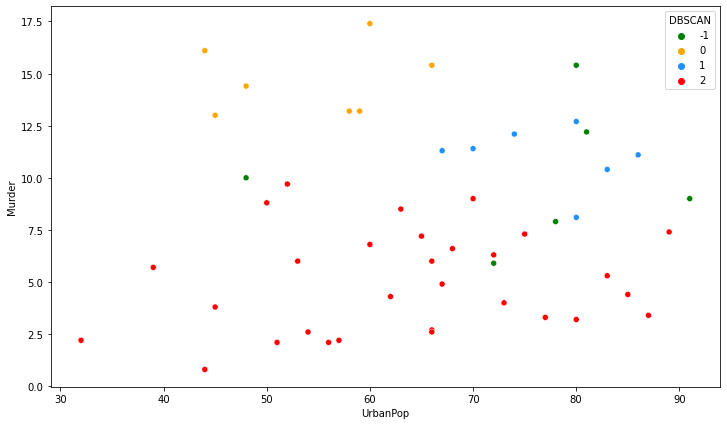

In [60]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=crime_data['UrbanPop'],y=crime_data['Murder'],hue=crime_data['DBSCAN'], palette=['green','orange','dodgerblue','red'])
plt.show()

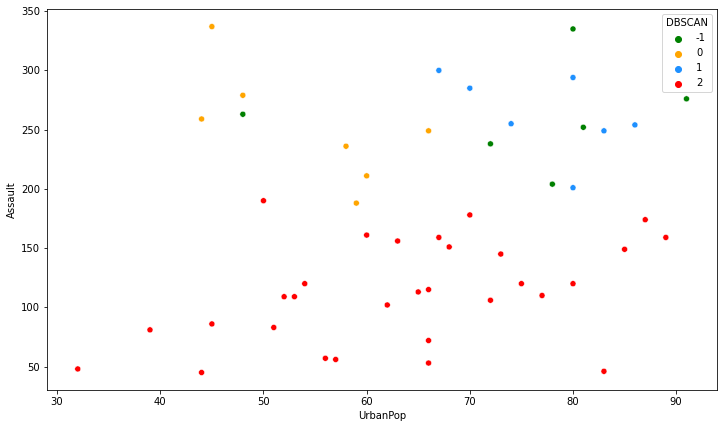

In [61]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=crime_data['UrbanPop'],y=crime_data['Assault'],hue=crime_data['DBSCAN'], palette=['green','orange','dodgerblue','red'])
plt.show()

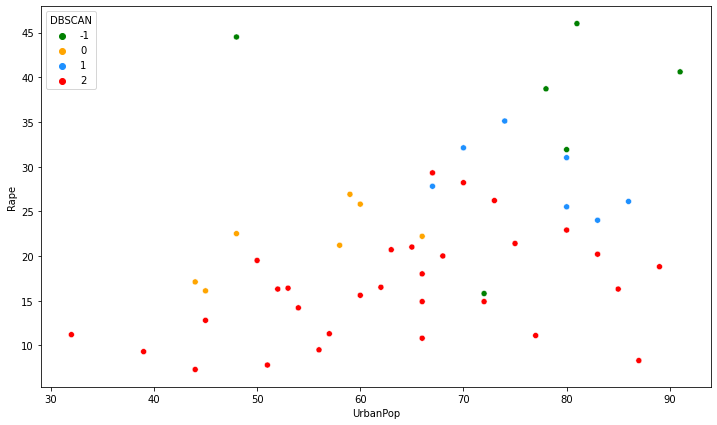

In [64]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=crime_data['UrbanPop'],y=crime_data['Rape'],hue=crime_data['DBSCAN'], palette=['green','orange','dodgerblue','red'])
plt.show()

## Silhouette score

In [49]:
metrics.silhouette_score(X,dbscan.labels_)

0.28523184583363054

# Inferences
- Kmeans and Hierarchical clustering will give better performance as the clusters are having good seperability from other clusters